In [ ]:
'''
# TODO: 
    -> Work in the data transformation
    -> Work in the data analysis
# FIXME: 
    -> Only 1000 profiles are listed by linkedin
'''

In [1]:
from credentials import login

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
from selenium.webdriver.chrome.service import Service
from chromedriver_py import binary_path
import csv

In [3]:
# Set your LinkedIn username and password

# Creating a webdriver instance
service_object = Service(binary_path)
driver = webdriver.Chrome(service=service_object)
# This instance will be used to log into LinkedIn

# Opening linkedIn's login page
driver.get("https://linkedin.com/uas/login")

# waiting for the page to load
time.sleep(5)

# entering username
username = driver.find_element(By.ID, "username")

# In case of an error, try changing the element
# tag used here.

# Enter Your Email Address
username.send_keys(login.username)

# entering password
pword = driver.find_element(By.ID, "password")
# In case of an error, try changing the element
# tag used here.

# Enter Your Password
pword.send_keys(login.password)	

# Clicking on the log in button
# Format (syntax) of writing XPath -->
# //tagname[@attribute='value']
driver.find_element(By.XPATH, "//button[@type='submit']").click()
# In case of an error, try changing the
# XPath used here.


In [4]:
# Open Company people profile
profile_url = "https://www.linkedin.com/company/wood-mackenzie/people/"
 
driver.get(profile_url)        # this will open the link

In [ ]:
# SCROLL PAGE
start = time.time()

# will be used in the while loop
initialScroll = 0
finalScroll = 1000

while True:
	driver.execute_script(f"window.scrollTo({initialScroll},{finalScroll})")
	# this command scrolls the window starting from
	# the pixel value stored in the initialScroll
	# variable to the pixel value stored at the
	# finalScroll variable
	initialScroll = finalScroll
	finalScroll += 1000

	# we will stop the script for 3 seconds so that
	# the data can load
	time.sleep(3)
	# You can change it as per your needs and internet speed

	end = time.time()

	# We will scroll for 300 seconds.
	# You can change it as per your needs and internet speed
	if round(end - start) > 600:
		break


In [6]:
src = driver.page_source

# Now using beautiful soup
soup = BeautifulSoup(src, 'lxml')

In [7]:

filename = 'linkedin_profiles.csv'
directory = ''
filepath = directory + filename
# open a csv file for writing
with open(filepath, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)

    # write the header row
    writer.writerow(['Name', 'Headline'])

    # find all <li> elements with class "grid grid__col--lg-8 block pt5 pr4 m0"
    li_elements = soup.find_all('li', class_='grid grid__col--lg-8 block pt5 pr4 m0')
    print(len(li_elements))
    # loop through each <li> element and extract the name and headline
    for li in li_elements:
        name_element = li.find('div', class_='org-people-profile-card__profile-title')
        name = name_element.text.strip() if name_element else ''
        headline_element = li.find('div', class_='artdeco-entity-lockup__subtitle')
        headline = headline_element.text.strip() if headline_element else ''
        writer.writerow([name, headline])



999


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from collections import Counter
import plotly.graph_objs as go


In [16]:
# Load the CSV file
df = pd.read_csv('linkedin_profiles.csv')
# Define a list of characters to remove
undesired_characters = ['@', '|', '&', '-', '/', ',', '"']

# Convert all columns to lowercase and remove undesired characters
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df = df.replace({r: '' for r in undesired_characters}, regex=True)



# Split the headline by words and count their frequency
headlines = ' '.join(df['Headline'].tolist()).split()
word_counts = Counter(headlines)

# create a list of words to remove
words_to_remove = ['wood', 'mackenzie', 'at', '|', '&', '@','-','/','of', 'and']

# Define the number of words in each combination
num_words = 4

# Generate a list of n-word combinations and remove any that contain words to remove
combinations = [' '.join(i) for i in zip(*[headlines[j:] for j in range(num_words)])]
combinations_counts = Counter(combinations)
for w in words_to_remove:
    for key in combinations_counts.copy():
        if w in key.split(' '):
            del combinations_counts[key]

print(combinations_counts)
# Get the top x most common n-word combinations
top_combinations = combinations_counts.most_common(30)

# Create a bar chart of the top two-word combinations
fig = go.Figure(
    [go.Bar(x=[val[0]], y=[val[1]], hovertext=[f"Frequency: {val[1]}"], name="") for val in top_combinations]
)
fig.update_layout(
    title="Most Common X Combinations in Headlines",
    xaxis_title="Combination",
    yaxis_title="Frequency",
    xaxis_tickangle=-90
)
fig.show()


Counter({'supply chain data analytics': 4, 'senior manager supply chain': 3, 'manager supply chain data': 3, 'data science software engineer': 2, 'data analyst upstream research': 2, 'research analyst data scientist': 2, 'senior upstream research analyst': 2, 'senior software engineering manager': 2, 'the energy transition research': 2, 'energy transition research associate': 2, 'global growth strategy director': 2, 'ev battery supply chain': 2, 'senior analyst north america': 2, 'manager supply chain consulting': 2, 'data analytics data analyst': 2, 'senior account manager european': 2, 'north sea upstream oil': 2, 'sea upstream oil gas': 2, 'associate equities research analyst': 1, 'research analyst (natural gas': 1, 'analyst (natural gas liquids)': 1, '(natural gas liquids) data': 1, 'gas liquids) data associate': 1, 'geoscientist finance professional director': 1, 'finance professional director enterprise': 1, 'professional director enterprise master': 1, 'director enterprise maste

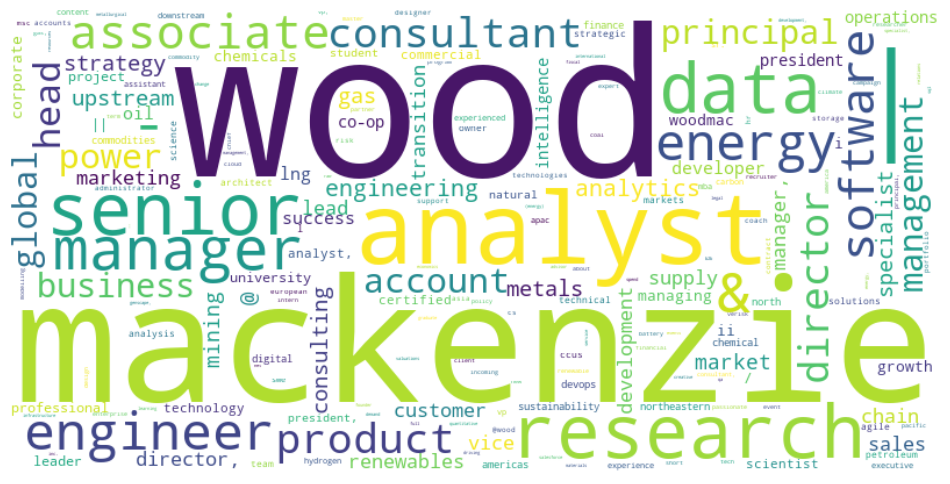

In [4]:
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# define stopwords list
stopwords = ['at', 'and', 'in', 'of', 'the', 'to', 'a', 'with', 'for', 'as', 'on', 'is', 'an', 'be', 'or', 'will', 'are']

# read in the csv file
filename = 'linkedin_profiles.csv'
with open(filename, 'r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    headlines = [row['Headline'] for row in reader]

# concatenate all headlines into a single string
all_headlines = ' '.join(headlines)

# convert all words to lowercase
all_headlines = all_headlines.lower()

# split string into individual words
words = all_headlines.split()

# remove stopwords
words = [word for word in words if word not in stopwords]

# count word frequency and create a word cloud
word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
